# Capstone 1 Project:  Milestone Report   
## US Car Accidents  
### *Sara Satti, May 2020*

## Introduction: 
Car accidents in the US average 6million every year, with 3million injuries and over 30,000 fatalities. In fact they are the leading cause of death among healthy Americans. As a result, millions of dollars are spent in medical bills, rapid response teams deployment, and destroyed property. The ability to predict the occurance of accidents given weather conditions, time of day, day of the week, and points of interest will have positive repurcussions in fiscal planning, and policies, or even in planning family roadtrip times.


<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/accidents_map.png?raw=true">

## Dataset:
The dataset contains close to 3million accident records from 49 states in the United States. This [Kaggle dataset](https://www.kaggle.com/sobhanmoosavi/us-accidents) is compiled by Sobhan Moosavi etal, and is intermittently updated with new data. The version used for this study covers the period *February 2016 to December 2019*, it was collated from several data sources, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.
The dataset contains a rich variety of data types to be experimented with. In the Data Wrangling section, we'll have a closer look at the data types present, and statistics on the numerical data.

## Objective:
This project has three distinct stages: Data Wrangling, Exploratory Data Analysis(EDA), and Machine Learning.<br>
Data Wrangling: involves infilling and tagging the data cells using appropriate methods.<br>
EDA: is an exploration of the various attributes in the dataset and their intertwined relationships. It is expected to answer a few questions such as:
+ Which states have the highest number of road accidents? <br>
+ Is the state with the highest number of accidents also the one with the most severe? <br>
+ Which time of day, and day of the week, do those severe accidents happen? <br>
+ Is inclement weather a factor? <br>
+ Are accidents more prevalent on the Left or Right side of the street? <br>
+ What role do points of interest (amenities, bumps, traffic lights, junctions etc.) play?<br>

Ultimately, the project will attempt to predict road accidents given certain weather conditions, points of interest, and locations. Sometimes accidents are categorized by **Severity**(1 reprensting a slight accident and 4 signifying highway closure), and at other times the aggregate or **total** number of accidents is taken into consideration.


## Data Wrangling:

The _data Wrangling Jupyter Notebook_ can be accessed [here!](https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Data%20Wrangling_US%20Accidents%20Dec19.ipynb) for more details and code. <br>

An initial look at the data, shows there are 49 columns/features in the dataset, with the numerical, and boolean data clearly categorized. The data marked "object" is either binary (Day/Night) as is in the case of 'Sunrise_Sunset' and 'Civil_Twighlight' features, or datetime as in 'Start_Time', 'End_Time' and 'Weather_Timestamp'. Categorical data such as 'State', and 'Weather_Condition' is also marked "object".

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('dec19_400k_rs1.csv') # sampled dataset

In [19]:
df.drop('Unnamed: 0', axis=1).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 49 columns):
ID                       400000 non-null object
Source                   400000 non-null object
TMC                      301701 non-null float64
Severity                 400000 non-null int64
Start_Time               400000 non-null object
End_Time                 400000 non-null object
Start_Lat                400000 non-null float64
Start_Lng                400000 non-null float64
End_Lat                  98299 non-null float64
End_Lng                  98299 non-null float64
Distance(mi)             400000 non-null float64
Description              400000 non-null object
Number                   141503 non-null float64
Street                   400000 non-null object
Side                     400000 non-null object
City                     399990 non-null object
County                   400000 non-null object
State                    400000 non-null object
Zipcode              

#### The main steps carried out were:
* Random sampling of the data - to reduce data size from 3million to 400K rows. This was necessary due to hardware limitations.
* Extract Day_of_Week and Time_of_Day from datetime data, and add as columns to dataframe.
* From Time_of_Day column, prepare Rush_Hour categorical column and attach to dataframe.
* Get null counts on data columns, and add a 'wasnull' column.
<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/non_zero%20missing%20data.png?raw=true"> 
* InFill missing weather values: Precipitation, Temperature, Humidity, Wind_Speed, Pressure and Visibility.
* Estimate Wind-Chill factor using LinearRegression, and infill missing values.
* Save edited file.

*Wind_Chill prediction tests* can be found in [this Jupyter Notebook](https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Wind_Chill%20Prediction%20tests.ipynb)

## Exploratory Data Analysis (Data Story):

The detailed analysis and code can be found in [Data Storytelling](https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Data%20Storytelling.ipynb) Jupyter Notebook.<br>

### Below is a summary of the main findings:
  .1. Fridays are the most dangerous days on the roads, that's when the greater number of most severe accidents happen. This makes sense, intuitively, since Fridays are the end of the workweek, when most people are probably exhausted.<br>
Tuesday, seems to be the day of highest **total** number of accidents.
<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/severity_count_by_day_of_week.png?raw=true">

Even though Friday, according to the table below, has the maximum number of accidents in levels 1, 3 and 4, the **total** number of accidents occurs on Tuesdays because it has the maximum number of level 2 accidents which is more than in the other 3 levels *combined*.
The safest day of the week, is Sunday.<br>
<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/GoogleSlide_img1.png?raw=true">
  .2. Most accidents occur during the day, on clear weather days, close to Traffic signals, Junctions and Crossings. This is probably because of the higher volume of traffice during the daytime. Drivers tend to drive more carefully when the weather is not clear. As for traffic signals, that's where pedestrians, and traffic tend to converge which probably requires a hightened sense of altertness and attention.
<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/top10_weather_conditions_affecting_number_of_accidents.png?raw=true">

<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/accidents_near_points_of_interest.png?raw=true">

  .3. Rush hour (7 to 8am, and 4 to 5pm) is another time where accident occurance spikes. This coincides with the time of day when traffic volume is highest. There is a sense of urgency involved too when people have to get to work, school or back home. The end of the day, is probably when people are tired after a long day at work.

<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/number_of_accidents_by_time_of_day.png?raw=true">


  .4. For *highest* number of *total* accidents, Texas and California are the top states, not a surprising fact given that these two states have the highest populations in the US.  Houston, Charlotte and Los Angeles appear as the top cities in this category. Charlotte is a surprise in the second place, since North Carolina is the fifth state in terms of total accidents. A possible explanation is that Charlotte has an anomalously high number compared to other parts of the state.

<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/total_number_of_accidents_by_state.png?raw=true">

<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/total_number_of_accidents_by_city.png?raw=true">

  .5. The most *severe* accidents occur in Florida and Georgia, with Miami and Atlanta being the top cities in the nation with the most severe accidents. 
Florida, however, ranks a very close second, after Maine, in terms of population age. The state has 20.5% adults over the age of 65. In addition, it ranks eights in terms of population density.<br>
Atlanta's position is unexpected since the city is not even in the top 35 in terms of population. Population density ranking is even further down the list.<br> 
<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/most_severe_accidents_by_state.png?raw=true">

<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/top20_cities_with_most_severe_accidents.png?raw=true">

  .6. There is an overall increasing trend in the total number of accidents in the country between Feb2016 and Dec 2019. This seems counter intuitive when compared to the 31% drop in total car sales in the US between 2016 and 2019. Are people driving older cars by opting not to change models as often? Are state budgets being allocated elsewhere such that road maintenance, and road safety campaigns are bearing the brunt?
<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/annual_accident_count_in400k_dataset.png?raw=true">

<img src="https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/Figures/monthly_accident_count_in400k_dataset_Feb16_Dec19.png?raw=true">

### Statistics:


Three steps of statistical analysis were run at different stages of the project:

__A.__ Running the .describe() on the dataframe gives us an idea about the basic statistics of the numerical features present. Severity is an integer value with a mean of 2.36. 
Visibility has a minimum of 0. and a mximum of 111miles.<br>
A desicion was made to take the outliers as extreme weather values, and not to delete or edit these values from the dataset.

__B.__ Looking at the correlations between the different features and the target. The highest correlations for Severity are with Distance, Day-of-the-week and Start_Long.

__C.__ Hypothesis testing to gain insight on the effect of weather conditions on traffic accident occurance.<br> An indepth look at the analysis is in the [US_Accidents_Statistics](https://github.com/ssatti0/Springboard_work/blob/master/Capstone%201%20project/US_Accidents_Statistical%20Analysis.ipynb) Jupyter notebook.<br> 
In summary, weather conditions DO have an impact on road accident severity, however, the number of samples used in the analysis can affect the outcome. 


In [5]:
# A. .describe()
df.drop('Unnamed: 0', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMC,301701.0,207.841485,20.295358,200.000000,201.000000,201.000000,201.000000,406.000000
Severity,400000.0,2.360142,0.541752,1.000000,2.000000,2.000000,3.000000,4.000000
Start_Lat,400000.0,36.493190,4.919935,24.570442,33.552807,35.844623,40.367809,49.000580
Start_Lng,400000.0,-95.418894,17.210788,-124.497523,-117.291287,-90.288139,-80.918633,-67.606875
End_Lat,98299.0,37.599169,5.002061,24.571534,33.959787,37.929230,41.380871,49.075000
End_Lng,98299.0,-99.986740,18.415574,-124.497442,-118.286333,-96.628680,-82.343977,-67.626605
Distance(mi),400000.0,0.287561,1.587642,0.000000,0.000000,0.000000,0.010000,333.630005
Number,141503.0,5820.272722,11736.123756,1.000000,845.500000,2716.000000,6999.000000,961052.000000
Temperature(F),392443.0,62.367451,18.780979,-77.800000,50.000000,64.400000,76.000000,168.800000
Wind_Chill(F),151072.0,51.328208,25.149195,-52.700000,32.000000,54.000000,73.000000,115.000000


In [6]:
data = pd.read_csv('dec19_400k_numeric_values.csv')

In [7]:
data = data.drop('Unnamed: 0',axis=1)

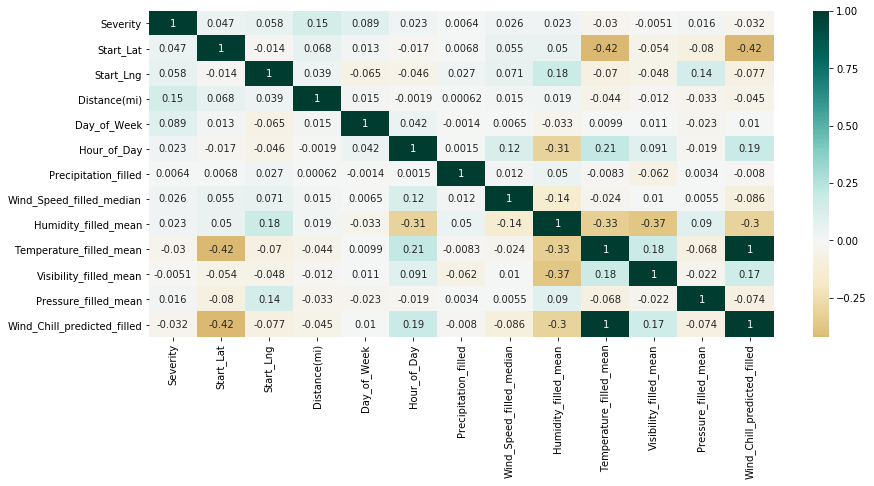

In [8]:
# B. Correlation between features and target:
plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(),annot=True, cmap='BrBG',center=0);

#### Summary:
At this point we have answers to the questions posed at the begining of the EDA. 
+ Which states have the highest number of road accidents? <br>
*Florida, Georgia, California, New York and Ohio have the highest number of road accidents.*<br>
<br>
+ Is the state with the highest number of accidents also the one with the most severe? <br>
*Even though some states appear in both severest and total number of accidents, their ranking varies. The top 5 states with total number of accidents are: California, Texas, Florida, South Carolina and North Carlina.*<br>
<br>
+ Which time of day, and day of the week, do those severe accidents happen? <br>
*Rush hour (7-8am and 4-5pm) is the time when most accidents occur. In other words, Daytime has a higher volume of accidents than Nighttime.<br>
Even though Fridays have the highest numbers of level 1,3 and 4 accidents, they are **not** the day of the week with the highest number of overall accidents. Tuesdays do.<br>*
<br>
+ Is inclement weather a factor? <br>
*Yes, 'Clear' days are the most dangers on the roads with a total number of accidents that are more than double those on 'Mostly Cloudy' days.
Accidents seem to happen during cloudy days more than during rainy or snowy days, which seems counter intuitive.<br>*
<br>
+ Are accidents more prevalent on the Left or Right side of the street? <br>
*Accidents are more prevalent on the Right side.<br>*
<br>
+ What role do points of interest (amenities, bumps, traffic lights, junctions etc.) play?<br>
*Traffic Signals, Junctions and Crossings are point_of_interest sites with most accidents. Bumps, Round_Abouts and No_Exit places have no accidents associated with them.*

### Next Step:
The next step of the project is to implement supervised machine learning models to predict the Severity.

## References:
- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.<br>
- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019. <br>
- https://www.thewanderingrv.com/car-accident-statistics/
- https://www.prb.org/which-us-states-are-the-oldest/
- https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population
- https://www.statista.com/statistics/199974/us-car-sales-since-1951/